# **Introduction**

This is a User-based Collaborative Movie Recommendation System build using [MovieLens Dataset](https://grouplens.org/datasets/movielens/100k/).

How this system works?

* Similarities between users are computed.
*  Based on the computed similarities, recommend movies liked by similar users and not watched by the target user.

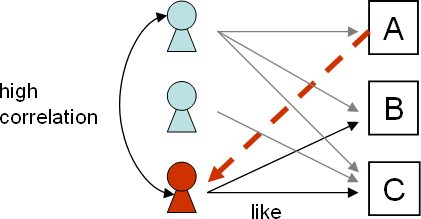

# **Load Data**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

ratings dataset contains the following features:-

* userId
* movieId
* rating 
* timestamp

In [80]:
cols = ['userId','movieId','rating','timestamp']
ratings = pd.read_csv('u.data', sep = '\t', names = cols)
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In movies dataset features required:-

* id - A unique identifier for each movie.
* belongs_to_collection: Name of the movie.


In [81]:
import chardet
with open('u.item', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [82]:
cols = ['movieId', 'Name', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,  17, 18, 19, 20, 21]
movies = pd.read_csv('u.item', sep = '|', encoding='ISO-8859-1', names = cols)
movies = movies[['movieId', 'Name']]
movies.head()

,movieId,Name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# **Data Preprocessing**

**Transforming data into required user-movie rating dataset**

In [ ]:
ratings.userId.unique()

array([196, 186,  22, 244, 166, 298, 115, 253, 305,   6,  62, 286, 200,
       210, 224, 303, 122, 194, 291, 234, 119, 167, 299, 308,  95,  38,
       102,  63, 160,  50, 301, 225, 290,  97, 157, 181, 278, 276,   7,
        10, 284, 201, 287, 246, 242, 249,  99, 178, 251,  81, 260,  25,
        59,  72,  87,  42, 292,  20,  13, 138,  60,  57, 223, 189, 243,
        92, 241, 254, 293, 127, 222, 267,  11,   8, 162, 279, 145,  28,
       135,  32,  90, 216, 250, 271, 265, 198, 168, 110,  58, 237,  94,
       128,  44, 264,  41,  82, 262, 174,  43,  84, 269, 259,  85, 213,
       121,  49, 155,  68, 172,  19, 268,   5,  80,  66,  18,  26, 130,
       256,   1,  56,  15, 207, 232,  52, 161, 148, 125,  83, 272, 151,
        54,  16,  91, 294, 229,  36,  70,  14, 295, 233, 214, 192, 100,
       307, 297, 193, 113, 275, 219, 218, 123, 158, 302,  23, 296,  33,
       154,  77, 270, 187, 170, 101, 184, 112, 133, 215,  69, 104, 240,
       144, 191,  61, 142, 177, 203,  21, 197, 134, 180, 236, 26

In [ ]:
ratings.movieId.unique()

array([ 242,  302,  377, ..., 1637, 1630, 1641])

In [83]:
n_users = ratings.userId.max()  #No. of users in the dataset
n_items = ratings.movieId.max()
A = np.zeros((n_users + 1,n_items + 1))
for line in ratings.itertuples():
    A[line[1],line[2]] = line[3]
print("Original rating matrix : ",A)

Original rating matrix :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 5. 3. ... 0. 0. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 ...
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]]


Considering, rating >= 3 is liked by the users and rating < 3 is disliked by the user.

A[i][j] => whether user (i) likes/dislikes movie (j)

A[i][j] = 1 => liked by the user

A[i][j] = 0 => disliked by the user

In [84]:
for i in range(len(A)):
  for j in range(len(A[0])):
    if A[i][j]>=3:
      A[i][j]=1
    else:
      A[i][j]=0
print(A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


**Movie Similarity Computation**

Used KNN algorithm with consine similarity matrix

In [85]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_jobs=-1)
knn.fit(A)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

**Recommendations for User**

Target User = User with userId 1

In [88]:
#filter consists of moviesId already liked by seen by user1
filter = ratings[ratings['userId'] == 1].movieId
filter = filter.tolist()
print("userId 1 watched: ")
for i in filter:
  print((movies[movies.movieId == i])['Name'].to_string(index = False))

userId 1 watched: 
Three Colors: White (1994)
Grand Day Out, A (1992)
Desperado (1995)
Glengarry Glen Ross (1992)
Angels and Insects (1995)
Groundhog Day (1993)
Delicatessen (1991)
Hunt for Red October, The (1990)
Dirty Dancing (1987)
Rock, The (1996)
Ed Wood (1994)
Star Trek: First Contact (1996)
Pillow Book, The (1995)
Horseman on the Roof, The (Hussard sur le toit,...
Star Trek VI: The Undiscovered Country (1991)
From Dusk Till Dawn (1996)
So I Married an Axe Murderer (1993)
Shawshank Redemption, The (1994)
True Romance (1993)
Star Trek: The Wrath of Khan (1982)
Kull the Conqueror (1997)
Independence Day (ID4) (1996)
Wallace & Gromit: The Best of Aardman Animation...
Wizard of Oz, The (1939)
Faster Pussycat! Kill! Kill! (1965)
Citizen Kane (1941)
Silence of the Lambs, The (1991)
Blues Brothers, The (1980)
Breaking the Waves (1996)
Robert A. Heinlein's The Puppet Masters (1994)
Crimson Tide (1995)
Four Weddings and a Funeral (1994)
Three Colors: Blue (1993)
Good, The Bad and The Ugly

In [89]:
#Get 5 similar users
ans=[]
distances , recommend = knn.kneighbors([A[1]],n_neighbors = 6)
recommend

array([[  1, 916, 864, 268,  92, 823]])

Recommeding any 5 movies

In [78]:
#Movies similar users liked
filter2 = []
for i in range(6):
  if (i != 1):
    temp = ratings[ratings['userId'] == recommend[0][i]].movieId
    filter2.extend(temp)

#Movies similar to users liked but watched by the target user.
count = 0
print("Recommended Movies:")
for i in filter2:
  if i not in filter:
    print((movies[movies.movieId == i])['Name'].to_string(index = False))
    count += 1

  if count == 5:
    break

Recommended Movies:
Bronx Tale, A (1993)
SubUrbia (1997)
Dangerous Minds (1995)
Malice (1993)
Tombstone (1993)
